In [1]:
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

import warnings
warnings.filterwarnings('ignore')

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Scaled the values between -1 and 1 depending on the largest value in the dataset

In [2]:
#Scaler
min_max = preprocessing.MinMaxScaler(feature_range=(-1,1))

In [3]:
df = pd.read_csv("/Users/shash/Downloads/data.csv", header=0)

In [4]:
df.head()

,grade1,grade2,label;;;;
0,34.623660,78.024693,0;;;;
1,30.286711,43.894998,0;;;;
2,35.847409,72.902198,0;;;;
3,60.182599,86.308552,1;;;;
4,79.032736,75.344376,1;;;;


Cleaning the dataset

In [5]:
#Cleaning the data
df.columns = ["grade1","grade2","label"]

x = df["label"].map(lambda x: float(x.rstrip(';')))

In [6]:
df.head()

,grade1,grade2,label
0,34.623660,78.024693,0;;;;
1,30.286711,43.894998,0;;;;
2,35.847409,72.902198,0;;;;
3,60.182599,86.308552,1;;;;
4,79.032736,75.344376,1;;;;


Creating the dependant and independant variables

In [7]:
#Categorizing variables as per dependencies.
X = df[["grade1","grade2"]]
X = np.array(X)
X = min_max.fit_transform(X)
Y = df["label"].map(lambda x: float(x.rstrip(';')))
Y = np.array(Y)

Splitting the data into training and testing

score Scikit learn:  0.9


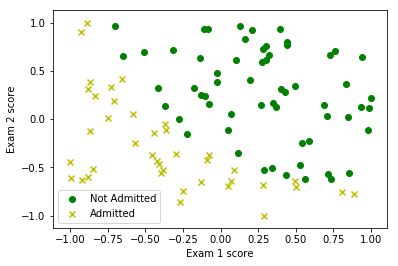

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# training the model with  scikit learn (library function)
clf = LogisticRegression()
clf.fit(X_train,Y_train)
print('score Scikit learn: ', clf.score(X_test,Y_test))

pos = where(Y == 1)
neg = where(Y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='g')
scatter(X[neg, 0], X[neg, 1], marker='x', c='y')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

The sigmoid function adjusts the cost function hypothesis to adjust the algorithm proportionally for worse estimations

In [9]:
def Sigmoid(z):
    G_of_Z = float(1.0 / float((1.0 + math.exp(-1.0*z))))
    return G_of_Z 

Hypothesis is used to calculate each instance of the cost function

In [10]:
#Linear combinations of all the known factors and their respective estimated coeffs.
def Hypothesis(theta, x):
    z = 0
    for i in range(len(theta)):
        z += x[i]*theta[i]
    return Sigmoid(z)

In [11]:
#For each member of the dataset, the result (Y) determines which variation of the cost function.
def Cost_Function(X,Y,theta,m):
    sumOfErrors = 0
    for i in range(m):
        xi = X[i]
        hi = Hypothesis(theta,xi)
        if Y[i] == 1:
            error = Y[i] * math.log(hi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-hi)
        sumOfErrors += error
    const = -1/m
    J = const * sumOfErrors
    print('cost is ', J) 
    return J

In [12]:
#Determining the gradient results wrt theta.
def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
    sumErrors = 0
    for i in range(m):
        xi = X[i]
        xij = xi[j]
        hi = Hypothesis(theta,X[i])
        error = (hi - Y[i])*xij
        sumErrors += error
    m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sumErrors
    return J


In [13]:
def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = []
    constant = alpha/m
    for j in range(len(theta)):
        CFDerivative = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
        new_theta_value = theta[j] - CFDerivative
        new_theta.append(new_theta_value)
    return new_theta

In [14]:
def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            Cost_Function(X,Y,theta,m)
            print('theta ', theta)
            print('cost is ', Cost_Function(X,Y,theta,m))
        Cross_Validation(theta)

In [15]:
def Cross_Validation(theta):
    score = 0
    winner = ""
    scikit_score = clf.score(X_test,Y_test)
    length = len(X_test)
    for i in range(length):
        prediction = round(Hypothesis(X_test[i],theta))
        answer = Y_test[i]
        if prediction == answer:
            score += 1
    my_score = float(score) / float(length)
    print('Our score: ', my_score)
    print('Library function (scikit) score: ', scikit_score) 

Determining the learning rate. Low alpha value to avoid overshooting results.

In [16]:
initial_theta = [0,0]
alpha = 0.1
iterations = 1000

Low alpha value to avoid overshooting results

In [17]:
Logistic_Regression(X,Y,alpha,initial_theta,iterations)

cost is  0.688695817471
theta  [0.015808968977217012, 0.014030982200249273]
cost is  0.688695817471
cost is  0.688695817471
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  

Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library func

Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
cost is  0.289810075955
theta  [3.0758031030008572, 2.8210921909376734]
cost is  0.289810075955
cost is  0.289810075955
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9


Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library function (scikit) score:  0.9
Our score:  0.9
Library func